In [1]:
import cmath
import functools
import math
import operator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def exp_by_limit(z: complex, n: int = 10) -> complex:
    """極限値による定義"""

    N = 10 ** n
    return pow(1 + z / N, N)

In [3]:
def factorial(n: int):
    return functools.reduce(operator.mul, range(1, n + 1), 1)


def exp_by_series(z: complex, n: int = 30) -> complex:
    """無限級数による定義"""

    return sum(pow(z, i) / factorial(i) for i in range(n))

In [4]:
def exp_by_real_func(z: complex) -> complex:
    """実関数による定義"""
    x, y = z.real, z.imag
    i = 0 + 1j
    return math.exp(x) * (math.cos(y) + math.sin(y) * i)

In [5]:
exp_by_limit(cmath.pi * (0 + 1j))

(-1+5.66553889764798e-16j)

In [6]:
exp_by_series(cmath.pi * (0 + 1j))

(-1.0000000000000002+3.461777852236587e-16j)

In [7]:
exp_by_real_func(cmath.pi * (0 + 1j))

(-1+1.2246467991473532e-16j)

In [8]:
cmath.exp(cmath.pi * (0 + 1j))

(-1+1.2246467991473532e-16j)

In [9]:
exp_by_series(1)

2.7182818284590455

In [10]:
def cos_by_series(z, n=30):
    return sum((-1) ** i * pow(z, 2 * i) / factorial(2 * i) for i in range(n))

In [11]:
def cos_by_exp(z):
    i = 0 + 1j
    return (cmath.exp(i * z) + cmath.exp(-i * z)) / 2

In [12]:
cos_by_series(cmath.pi + 0j)

(-1.0000000000000002+0j)

In [13]:
cos_by_exp(cmath.pi + 0j)

(-1+0j)

In [14]:
cmath.cos(cmath.pi + 0j)

(-1-0j)

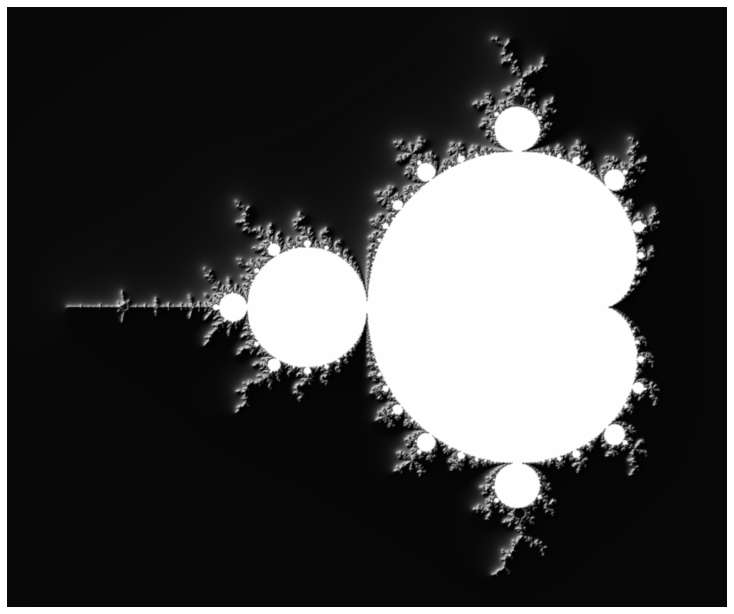

In [28]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import colors


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn, dtype=np.float64)
    Y = np.linspace(ymin, ymax, yn, dtype=np.float64)
    C = X + Y[:, None] * 1j
    N = np.zeros(C.shape, dtype=int)
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I] ** 2 + C[I]
    N[N == maxiter - 1] = 0
    return Z, N


xmin, xmax, xn = -2.25, +0.75, 3000 // 2
ymin, ymax, yn = -1.25, +1.25, 2500 // 2
maxiter = 200
horizon = 2.0 ** 40
log_horizon = np.log(np.log(horizon)) / np.log(2)
Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

with np.errstate(invalid="ignore"):
    M = np.nan_to_num(N + 1 - np.log(np.log(abs(Z))) / np.log(2) + log_horizon)

dpi = 72
width = 10
height = 10 * yn / xn
fig = plt.figure(figsize=(width, height), dpi=dpi)
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

# Shaded rendering
light = colors.LightSource(azdeg=315, altdeg=0)
M = light.shade(
    M, cmap=plt.cm.binary, vert_exag=1.5, norm=colors.PowerNorm(0.01), blend_mode="hsv"
)
plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
ax.set_xticks([])
ax.set_yticks([])

plt.show()